In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Set path

path = r"C:\Users\marce\Documents\Instacart Basket Analysis"

In [3]:
# Import customers.csv

df= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [6]:
df.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [20]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404161 entries, 0 to 32404160
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float16 
 7   add_to_cart_order       float16 
 8   reordered               float16 
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int8    
 12  prices                  float16 
 13  price_range_loc         object  
 14  busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int8    
 18  loyalty_flag            object  
 19  mean_prices             float32 
 20  spender_level           object  
 21  median

In [8]:
# Create a list holding Frue/False values to the test np.random.rand() <= 0.7 with random number(seed) '4'

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [9]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [10]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [11]:
 df_1 = small[['order_hour_of_day', 'department_id']]

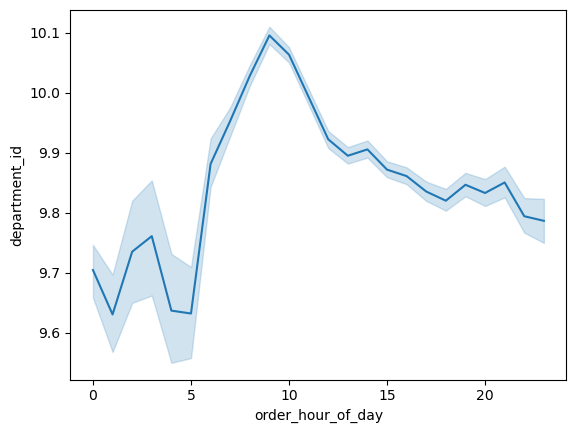

In [13]:
line = sns.lineplot(data = df_1, x ='order_hour_of_day',y = 'department_id')

In [14]:
df_2 = small [['order_hour_of_day', 'prices']]

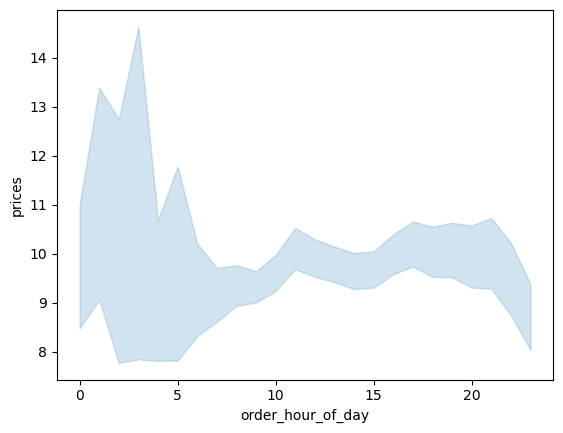

In [15]:
line_prices = sns.lineplot(data = df_2, x ='order_hour_of_day',y = 'prices')

In [17]:
busiest_hour_dept = ords_prods_merge[ords_prods_merge['order_hour_of_day'] == 10]

In [21]:
busiest_hour_dept['department_id'].value_counts(dropna = False)

4     800246
16    469208
19    262966
7     244988
1     169769
13    158281
3      98131
15     90046
20     88319
9      69190
17     64054
14     62413
12     57062
11     37125
18     34390
6      22596
5      13394
8       7580
21      5884
10      3086
2       2972
Name: department_id, dtype: int64

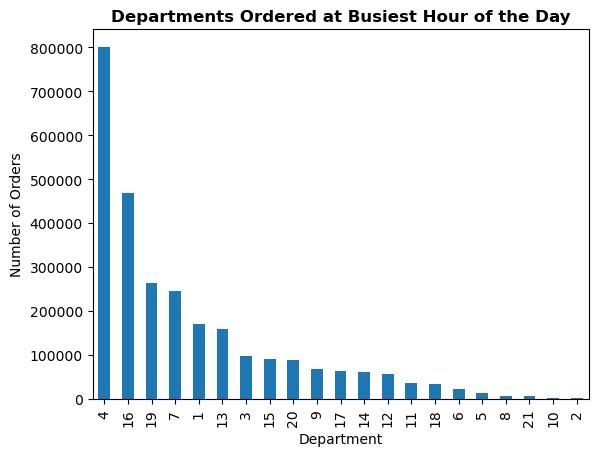

In [22]:
# Creating bar chart for departments at busiest hour of the day

dept_count = busiest_hour_dept['department_id'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Departments Ordered at Busiest Hour of the Day', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

In [23]:
# Exporting busiest dept chart

busiest_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_dept.png'))

In [31]:
ords_prods_merge['order_hour_of_day'].value_counts(dropna= False)

10    2761700
11    2736077
14    2689083
15    2662082
13    2660906
12    2618479
16    2535141
9     2454151
17    2087598
8     1718068
18    1636473
19    1258275
20     976138
7      891030
21     795624
22     634220
23     402310
6      290487
0      218767
1      115700
5       87959
2       69372
4       53241
3       51280
Name: order_hour_of_day, dtype: int64

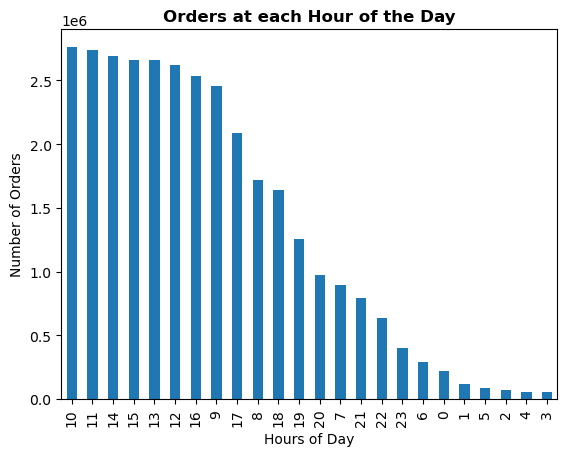

In [32]:
# Creating bar chart for orders  hour of the day based of price

order_hour_count = ords_prods_merge['order_hour_of_day'].value_counts(dropna=False)
order_hour_count = order_hour_count.plot.bar()
plt.title('Orders at each Hour of the Day', fontweight='bold')
plt.xlabel('Hours of Day')
plt.ylabel('Number of Orders')
plt.show()

In [33]:
price_grou = ords_prods_merge['prices'].value_counts(dropna=False)

In [34]:
price_count

12.296875    624261
10.296875    510496
4.000000     447272
6.300781     438467
1.299805     425691
              ...  
20.203125       123
22.703125        99
21.500000        85
18.296875        11
21.000000         8
Name: prices, Length: 241, dtype: int64

In [7]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [9]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [12]:
ords_prods_merge.loc[ords_prods_merge['prices'] <=5, 'price_range_loc'] = 'Low-range product'

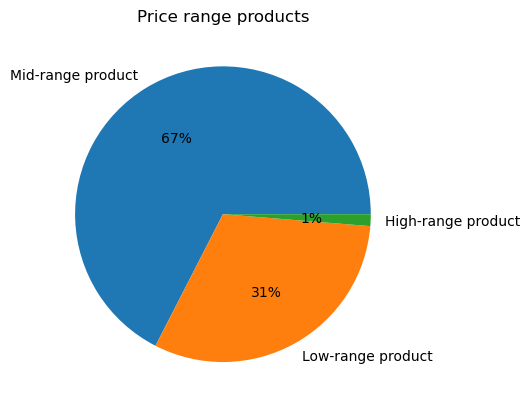

In [14]:
# Create Pie Chart for 'price range'

price_range = ords_prods_merge['price_range_loc'].value_counts().plot.pie(title ='Price range products', label = '', autopct=('%1.f%%'))

In [18]:
# Exporting price range pie chart

price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range.png'))

In [20]:
ords_prods_merge['department_id'].value_counts(dropna=False)

4     9479291
16    5398049
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

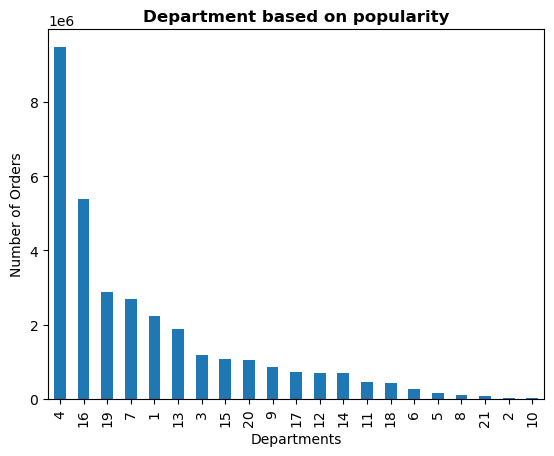

In [24]:
departments_count = ords_prods_merge['department_id'].value_counts(dropna=False)
departments_count = departments_count.plot.bar()
plt.title('Department based on popularity', fontweight='bold')
plt.xlabel('Departments')
plt.ylabel('Number of Orders')
plt.show()

In [25]:
# Exporting departments bar chart

departments_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_count.png'))

In [29]:
ords_prods_merge['loyalty_flag'].value_counts()

Regular customer    15876363
Loyal customer      10284010
New customer         6243788
Name: loyalty_flag, dtype: int64

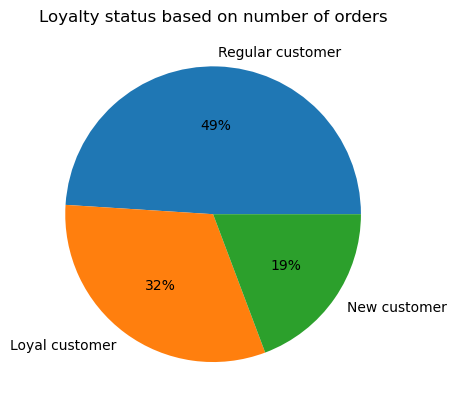

In [33]:
loyal_st = ords_prods_merge['loyalty_flag'].value_counts().plot.pie(title ='Loyalty status based on number of orders', label = '', autopct=('%1.f%%'))

In [35]:
# Exporting loyal status  pie chart

loyal_st .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_st.png'))

In [38]:
ords_prods_merge['Frequency_flag'].value_counts(dropna = True)

Frequent customer        21559380
Regular customer          7208433
Non-frequent customer     3636343
Name: Frequency_flag, dtype: int64

In [40]:
loyalty_freq = pd.crosstab(ords_prods_merge['loyalty_flag'], ords_prods_merge['Frequency_flag'], dropna = False)

In [41]:
loyalty_freq

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279877,0,4133
New customer,1648577,2724886,1870320
Regular customer,9630926,911457,5333980


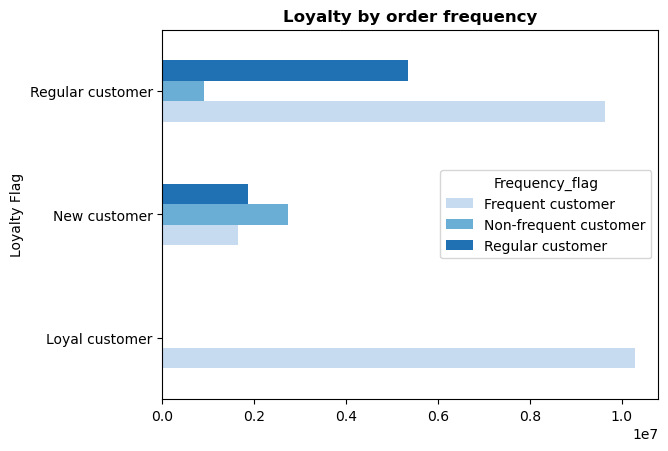

In [42]:
# Creating bar chart for loyalty status vs order frequency

loyalty_freq_bar = loyalty_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Loyalty by order frequency', fontweight = 'bold')
plt.ylabel('Loyalty Flag')
plt.show()

In [43]:
# Exporting loyalty and order frequency distribution

loyalty_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_freq_distribution.png'))

In [44]:
ords_prods_merge['region'].value_counts(dropna = True)

South        10791640
West          8292785
Midwest       7597106
Northeast     5722630
Name: region, dtype: int64

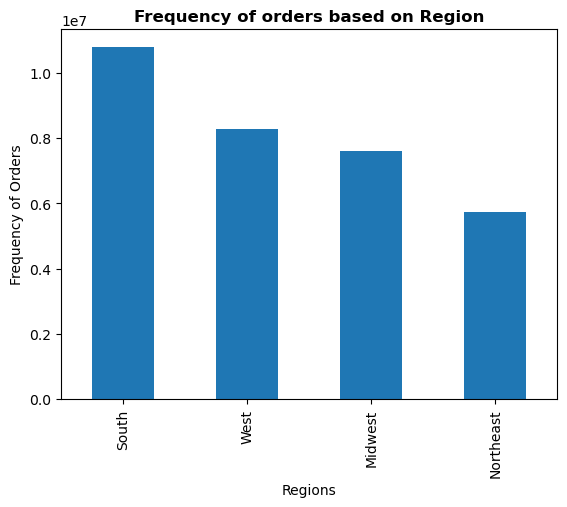

In [49]:
region_count = ords_prods_merge['region'].value_counts(dropna=False)
region_count = region_count.plot.bar()
plt.title('Frequency of orders based on Region', fontweight='bold')
plt.xlabel('Regions')
plt.ylabel('Frequency of Orders')
plt.show()

In [50]:
# Exporting orders by region bar chart

region_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_count.png'))

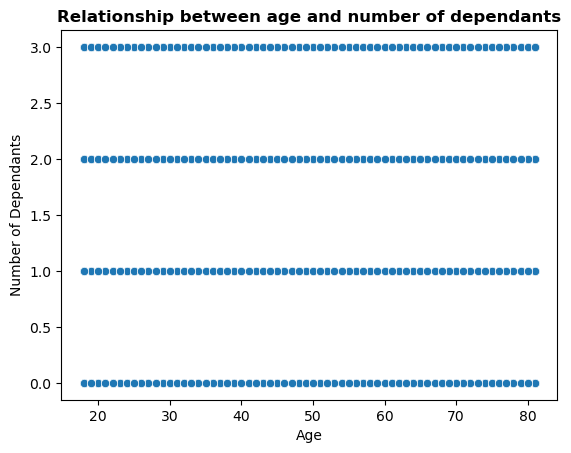

In [53]:
# Creating scatterplot for age and number of dependants

age_family = sns.scatterplot(x = 'age', y = 'dependants_number',data = ords_prods_merge)
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.title('Relationship between age and number of dependants', fontweight = 'bold')
plt.show()

In [54]:
# Exporting chart for age Vs number of dependants

age_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family.png'))